In [1]:
using Gadfly
using Distributions
using Interact

______

https://faculty.washington.edu/ezivot/econ424/timeseriesconcepts.pdf

# 1.1 Stochastic Processes

A stochastic process is a sequence of random variables indexed by time $t$.

$$ \{\ldots,Y_{1},Y_{2}, \ldots ,Y_{t}, Y_{t+1},\ldots\}= \{Y\}^T_{t=-\infty}$$

In modeling time series data, the ordering imposed by the time index is important because we often would like to capture the temporal relationships, if any, between the random variables in the stochastic process. In random sampling from a population, the ordering of the random variables representing the sample does not matter because they are independent.

A realization of a stochastic process with $T$ observations is the sequence of observed data.

$$ \{Y_{1}=y_1,Y_{2}=y_2, \ldots ,Y_{T} = t_T \}= \{Y\}^T_{t=1}$$

## 1.1.1 Stationary Stochastic Processes

________
__ Definition__ _Strict stationarity_

A stochastic process $\{Y_t\}^\infty_{t=-\infty}$ is strictly stationary if, for any given finite
integer $r$ and for any set of subscripts $t_1, t_2, \ldots, t_r$ the joint distribution of
$(Y_{t_1}, Y_{t_2}, \ldots, Y_{t_r})$ depends only on $t_1 - t, t_2 - t, \ldots, t_r - t$ but not on $t$.

________
In simple terms, the joint distribution of random variables in a strictly stationary stochastic process is time invariant. For example, the joint distribution of $(Y_1, Y_5, Y_7)$ is the same as the distribution of $(Y_{12}, Y_{16}, Y_{18})$.

________
__ Example__ _iid sequence_

If $\{Y_t\}^\infty_{t=-\infty}$ is an iid sequece, then it is strictly stationary.
________

__ Definition__ _Covariance stationarity_

A stochastic process $\{Y_t\}^\infty_{t=1}$ is covariance stationary if:

__1.__ $E[Y_t] = \mu $ does not depend on $t$.

__2.__ $var(Y_t) = \sigma^2 $ does not depend on $t$.

__1.__ $cov(Y_t,Y_{t-j}) = \gamma_j $ exists, is finite, and depends only on $j$ but not on $t$ for $j = 0,1,2, \ldots$
________

If we assume that the stochastic process $\{Y_t\}^\infty_{t=-\infty}$  is strictly stationary and that $E[Y_t]$, $var(Y_t)$, and all pairwise covariances exist, then we say that $\{Y_t\}^\infty_{t=-\infty}$ is a covariance stationary stochastic process.
_____
__ Example__ _Gaussian White Noise_

Let  $ Y_t\sim \, iid \, \ N(0, \sigma^2)$. Then $\{Y_t\}^\infty_{t=-\infty}$ is called a Gaussian white noise process.

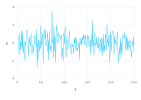

In [2]:
plot(x=collect(1:250), y=rand(Normal(0,1), 250), Geom.line)

________

## 1.1.2 Non-Stationary Processes

In a covariance stationary stochastic process it is assumed that the means, variances and autocovariances are independent of time. In a non-stationary process, one or more of these assumptions is not true.

_____
__Example __ _Deterministically trending process_

Suppose $\{Y_t\}^\infty_{t=0}$ is generated according to the deterministically trending process

$$ Y_t = \beta_0 + \beta_1 t + \varepsilon_t \sim WN(0, \sigma^2_\varepsilon) \quad \quad t = 0, 1, 2, \ldots $$

Then $\{Y_t\}^\infty_{t=0}$ is nonstationary because the mean of $Y_t$ depends on $t$:

$$ E[Y_t] = \beta_0 + \beta_1 t \quad \textrm{   depends on } t.$$

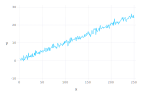

In [3]:
plot(x=collect(1:250),y=0.1.*collect(1:250)+rand(Normal(0,1), 250), Geom.line)

________

Here the non-stationarity is created by the deterministic trend $Y_t = 0.1 t + \varepsilon_t, \varepsilon_t \sim N(0,1) $ in the data. The non-stationary process $\{Y_t\}^\infty_{t=0}$ can be transformed into a stationary process by simply subtracting off the trend:

$$ X_t = Y_t - \beta_0 - \beta_1t = \varepsilon_t \sim \textrm{WN}(0, \sigma^2_\varepsilon ) $$

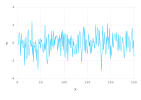

In [4]:
plot(x=collect(1:250),y=(0.1*collect(1:250)+rand(Normal(0,1), 250)) - (0.1*collect(1:250)), Geom.line)

____________
__Example __ _Random walk_

A random walk ($\textrm{RW}$) process $\{Y_t\}^\infty_{t=1}$ is defined as

$$ Y_t = Y_{t-1} + \varepsilon_t, \quad \varepsilon_t \sim \textrm{IWN}(0, \sigma^2_\varepsilon), \quad Y_0 \textrm{ is fixed (non-random).}$$

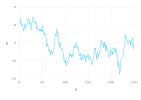

In [5]:
plot(x=collect(1:250),y=cumsum(rand(Normal(0,1), 250)), Geom.line)

_________

## 1.1.3 Ergodicity

In a strictly stationary or covariance stationary stochastic process no assumption is made about the strength of dependence between random variables in the sequence.
However, in many contexts it is reasonable to assume that the strength of dependence between random variables in a stochastic process diminishes the farther apart they become.
This diminishing dependence assumption is captured by the concept of ergodicity.
_________

__Definition__ _Ergodicity (intuitive definition)_

Intuitively, a stochastic process $\{Y_t\}^\infty_{t=-\infty}$ is ergodic if any two collections of
random variables partitioned far apart in the sequence are essentially independent.

______

The formal definition of ergodicity is highly technical and requires advanced concepts in probability theory. However, the intuitive definition captures the essence of the concept. The stochastic process $\{Y_t\}^\infty_{t=-\infty}$ is ergodic if $Y_t$ and $Y_{t-j}$ are essentially independent if $j$ is large enough.

_________

__Example__ _White noise processes_

If $\{Y_t\}^\infty_{t=-\infty}$ is $\textrm{GWN}$ then it is both covariance stationary and ergodic.
_____

The different flavors of __white noise processes__ are not very interesting because they __do not allow any linear dependence__ between the observations in the series. The following sections describe some simple covariance stationary and ergodic time series models that allow for different patterns of time dependence captured by autocorrelations.

# 1.2 Moving Average Processes

Moving average models are simple covariance stationary and ergodic time
series models that can capture a wide variety of autocorrelation patterns.

## 1.2.1 MA(1) Model

Suppose you want to create a covariance stationary and ergodic stochastic process $\{Y_t\}^\infty_{t=-\infty}$ in which $Y_t$ and $Y_{t−1}$ are correlated but $Y_t$ and $Y_{t−j}$ are not correlated for $j > 1$. That is, the time dependence in the process only lasts for one period. Such a process can be created using the first order moving average ($\textrm{MA}(1)$) model:

$$ Y_t = \mu + \varepsilon_t + \theta \varepsilon_{t-1}, \quad -1<\theta < 1, \quad \varepsilon_t \sim iid \, N(0, \sigma^2_\varepsilon)$$.

The moving average parameter $\theta$ determines the sign and magnitude of the
correlation between $Y_t$ and $Y_{t_1}$. Clearly, if $\theta = 0 $ then $Y_t = \mu + \varepsilon_t $ so that
$\{Y_t\}^\infty_{t=-\infty}$ exhibits no time dependence.

To verify that the process is a covariance stationary process we must show that the mean, variance and autocovariances are time invariant.

![title](./ma_dem.png)

__Example__ _Simulated values from MA(1) process_

Interact.Options{:SelectionSlider,Float64}(1: "input" = 0.0 Float64 , "μ", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = 0.0 Float64 , "θ", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(5: "input-3" = 1.5 Float64 , "σ", 1.5, "1.5", 6, Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…), Dict(1.2=>"1.2",2.0=>"2.0",1.5=>"1.5",1.4=>"1.4",1.6=>"1.6",1.9=>"1.9",1.1=>"1.1",1.3=>"1.3",1.8=>"1.8",1.7=>"1.7"…)), Any[], Any[], true, "horizontal", true)

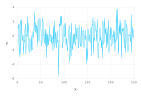

In [6]:
@manipulate for μ in -1:.1:1, θ in -1:.1:1, σ in 1:.1:2
    xs = collect(1:249)
    es = rand(Normal(0,σ), 250)
    ys = zeros(249)
    
    for t in 1:250
        if t > 1
            ys[t-1] = μ + es[t] + θ*es[t-1]
        end
    end
    
    plot(x=xs, y=ys, Geom.line)
end        

________
__Example__ _Simulated values from MA(3) process_

Interact.Options{:SelectionSlider,Float64}(9: "input-4" = 0.0 Float64 , "μ", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(11: "input-5" = 0.0 Float64 , "θ_1", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(13: "input-6" = 0.0 Float64 , "θ_2", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(15: "input-7" = 0.0 Float64 , "θ_3", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(17: "input-8" = 1.5 Float64 , "σ", 1.5, "1.5", 6, Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…), Dict(1.2=>"1.2",2.0=>"2.0",1.5=>"1.5",1.4=>"1.4",1.6=>"1.6",1.9=>"1.9",1.1=>"1.1",1.3=>"1.3",1.8=>"1.8",1.7=>"1.7"…)), Any[], Any[], true, "horizontal", true)

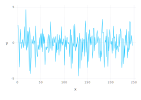

In [7]:
@manipulate for μ in -1:.1:1, θ_1 in -1:.1:1, θ_2 in -1:.1:1, θ_3 in -1:.1:1, σ in 1:.1:2
    xs = collect(1:247)
    es = rand(Normal(0,σ), 250)
    ys = zeros(247)
    
    for t in 1:250
        if t > 3
            ys[t-3] = μ + es[t] + θ_1*es[t-1]+ θ_2*es[t-2] + θ_3*es[t-3]
        end
    end
    
    plot(x=xs, y=ys, Geom.line)
end        

___________


# 1.3 Autoregressive Processes

## 1.3.1 AR(1) Model

Suppose you want to create a covariance stationary and ergodic stochastic process $\{Y_t\}^\infty_{t=-\infty}$ in which $Y_t$ and $Y_{t−1}$ are correlated and $Y_t$ and $Y_{t−2}$ are slightly less correlated, $Y_t$ and $Y_{t−3}$ are even less correlated and eventually $Y_t$ and $Y_{t−j}$ are uncorrelated for $j$ large enough. That is, the time dependence in the process decays to zero as the random variables in the process get farther and farther apart. Such a process can be created using the first order autoregressive (AR(1)) model:

$$ Y_t - \mu = \phi (Y_{t-1} - \mu) + \varepsilon_t, \quad -1 < \phi < 1, \quad \varepsilon_t \sim \, iid \, N(0, \sigma^2_\varepsilon) $$

It can be shown that the AR(1) model is covariance stationary and ergodic provided $-1 < \phi < 1$. We can also show that the AR(1) process has the following properties:

![title](./ar_prop.png)

__Example__ _Simulated values from AR(1) process_

Interact.Options{:SelectionSlider,Float64}(21: "input-9" = 0.0 Float64 , "μ", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(23: "input-10" = 0.0 Float64 , "ϕ", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(25: "input-11" = 1.5 Float64 , "σ", 1.5, "1.5", 6, Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…), Dict(1.2=>"1.2",2.0=>"2.0",1.5=>"1.5",1.4=>"1.4",1.6=>"1.6",1.9=>"1.9",1.1=>"1.1",1.3=>"1.3",1.8=>"1.8",1.7=>"1.7"…)), Any[], Any[], true, "horizontal", true)

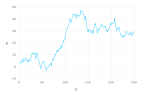

In [9]:
@manipulate for μ in -1:.1:1, ϕ in -1:.1:1, σ in 1:.1:2
    xs = collect(1:250)
    es = rand(Normal(0,σ), 250)
    ys = zeros(250)
    
    for t in 1:250
        if t <= 1
            ys[t] = μ - ϕ*μ + es[t]
        else
            ys[t] = μ - ϕ*μ ys[t-1] + es[t]
        end
    end
    
    plot(x=xs, y=ys, Geom.line)
end        

________
__Example__ _Simulated values from AR(3) process_

Interact.Options{:SelectionSlider,Float64}(97: "input-45" = 0.0 Float64 , "μ", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(99: "input-46" = 0.0 Float64 , "ϕ_1", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(101: "input-47" = 0.0 Float64 , "ϕ_2", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(103: "input-48" = 0.0 Float64 , "ϕ_3", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(105: "input-49" = 1.5 Float64 , "σ", 1.5, "1.5", 6, Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…), Dict(1.2=>"1.2",2.0=>"2.0",1.5=>"1.5",1.4=>"1.4",1.6=>"1.6",1.9=>"1.9",1.1=>"1.1",1.3=>"1.3",1.8=>"1.8",1.7=>"1.7"…)), Any[], Any[], true, "horizontal", true)

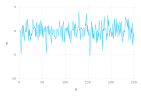

In [19]:
@manipulate for μ in -1:.1:1, ϕ_1 in -1:.1:1, ϕ_2 in -1:.1:1, ϕ_3 in -1:.1:1, σ in 1:.1:2
    xs = collect(1:250)
    es = rand(Normal(0,σ), 250)
    ys = zeros(250)

    for t in 4:250
        ys[t] = μ + ϕ_1*ys[t] + ϕ_2*ys[t-1] + ϕ_3*ys[t-3]+es[t-2]
    end
    
    plot(x=xs, y=ys, Geom.line)
end        

_______